In [71]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [72]:
#get the dataset
data = pd.read_csv('../_data/Actresses_1670-1700.csv')
data

,Actress,Year,Play,Dramatist,Role,Type,Generic markers
0,Elizabeth Barry,1675.0,Alcibiades,Thomas Otway,Draxilla,maid,NaN
1,Elizabeth Barry,1676.0,Abdelazar,Aphra Behn,Leonora,young girl,NaN
2,Elizabeth Barry,1676.0,The Wrangling Lovers,Edward Ravenscroft,Elvira,young girl,NaN
3,Elizabeth Barry,1676.0,Tom Essence,Thomas Rawlins,Theodocia,young girl,NaN
4,Elizabeth Barry,1676.0,Madam Fickle,Thomas Durfey,Constantiana,young girl,NaN
...,...,...,...,...,...,...,...
497,Nell Gwyn,1668.0,The Mulberry Garden,Charles Sedley,Olivia,young girl,NaN
498,Nell Gwyn,1668.0,An Evening's Love,John Dryden,Donna Jacintha,young girl,NaN
499,Nell Gwyn,1668.0,The Damoiselles a la Mode,Richard Flecknoe,Lysette,maid,NaN
500,Nell Gwyn,1669.0,Tyrannick Love,John Dryden,Valeria,young girl,NaN


In [73]:
# get a list of what unique entries exist in 'Geneic markers'
unique_entries = data['Generic markers'].unique()

print(unique_entries)

[nan 'breeches' 'raped' 'breeches ; raped']


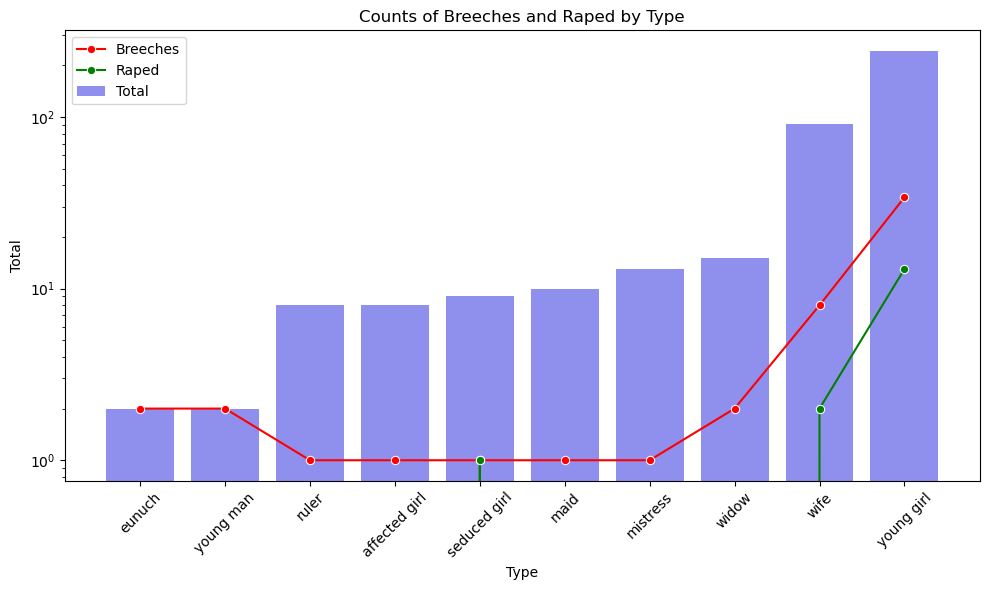

In [74]:

# remove the Types that have less than 10 occurrences
data_rem = data[data['Type'].isin(data['Type'].value_counts()[data['Type'].value_counts() >= 1].index)]
# get a list of the types
types = data_rem['Type'].unique()
# get a count of the total number of occurrences of each type
type_counts = data_rem['Type'].value_counts()

# create a df with the counts of 'breeches' and 'raped' in the 'Generic markers' column, grouped by 'Type'
countDF = data_rem.groupby('Type')['Generic markers'].value_counts().unstack(fill_value=0)

#add a column to the count DF that adds a total count of each type in data
countDF['Total'] = type_counts

countDF = countDF.sort_values(by='Total', ascending=True)
#for each type, get a count of the amount of 'breeches' and 'raped' in the 'Generic markers' column

# plot a bar chart of the 'Total' and have to seperate lines for breeches and raped
plt.figure(figsize=(10, 6))
sns.barplot(x=countDF.index, y=countDF['Total'], color='blue', alpha=0.5, label='Total')
sns.lineplot(x=countDF.index, y=countDF['breeches'], color='red', label='Breeches', marker='o')
sns.lineplot(x=countDF.index, y=countDF['raped'], color='green', label='Raped', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Type')
# Sort the dataframe by 'Total' in ascending order
countDF = countDF.sort_values(by='Total', ascending=True)
plt.yscale('log')
plt.title('Counts of Breeches and Raped by Type')
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
countDF

Generic markers,breeches,breeches ; raped,raped,Total
Type,,,,
eunuch,2,0,0,2
young man,2,0,0,2
ruler,1,0,0,8
affected girl,1,0,0,8
seduced girl,1,1,1,9
maid,1,0,0,10
mistress,1,0,0,13
widow,2,0,0,15
wife,8,0,2,91


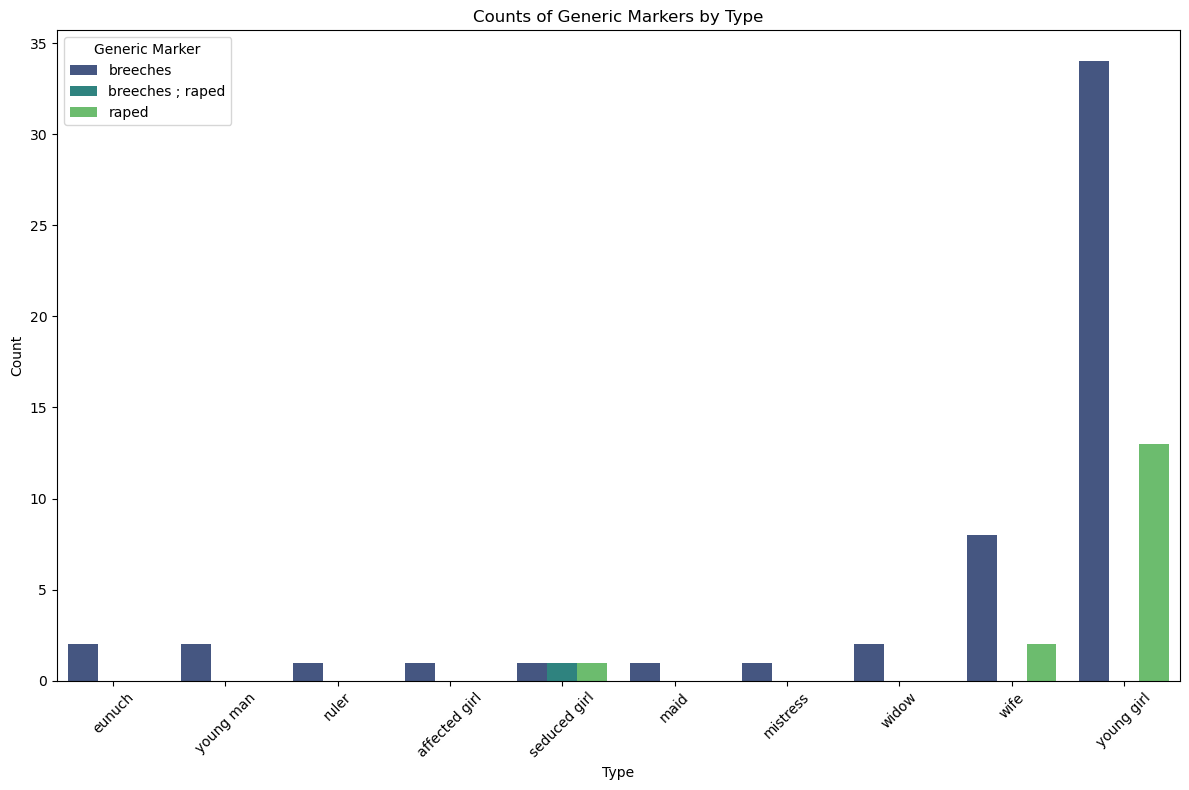

In [76]:
# create a visualization of each 'Type', grouped bar chart
def plot_grouped_bar_chart(countDF):
    # Reset the index to make 'Type' a column for easier plotting
    countDF = countDF.reset_index()

    # Melt the dataframe to have a long-form structure for seaborn
    melted_df = countDF.melt(id_vars='Type', var_name='Generic Marker', value_name='Count')

    # Create a grouped bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(data=melted_df, x='Type', y='Count', hue='Generic Marker', palette='viridis')
    plt.title('Counts of Generic Markers by Type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#remove the 'Total' column from the countDF
countDF = countDF.drop(columns=['Total'])
# Plot the grouped bar chart
plot_grouped_bar_chart(countDF)


In [77]:
# get a lis of the unique plays
plays = data['Play'].unique()

# get a list of each unique actress
actresses = data['Actress'].unique()

# create a df that contins the number of connections between each two actresses
connections = pd.DataFrame(index=actresses, columns=actresses)

# for each play, get a list of the names of the actresses that has played in them 
for play in plays:
    actresses = data[data['Play'] == play]['Actress'].unique()
    # for each pair of actresses, add 1 to the number of connections between them
    for i in range(len(actresses)):
        for j in range(i + 1, len(actresses)):
            if pd.isna(connections.loc[actresses[i], actresses[j]]):
                connections.loc[actresses[i], actresses[j]] = 1
            else:
                connections.loc[actresses[i], actresses[j]] += 1
            if pd.isna(connections.loc[actresses[j], actresses[i]]):
                connections.loc[actresses[j], actresses[i]] = 1
            else:
                connections.loc[actresses[j], actresses[i]] += 1
#set the lower triangle of the connections matrix to 0
for i in range(len(connections)):
    for j in range(i):
        connections.iloc[i, j] = 0
connections

,Elizabeth Barry,Mary Betterton,Jane Rogers,Susannah Mountfort,Rebecca Marshall,Jane Long,Frances Maria Knight,Mary Lee,Mary (‘Moll’) Davis,Elizabeth Currer,Charlotte Butler,Anne Bracegirdle,Elizabeth Boutell,Nell Gwyn
Elizabeth Barry,NaN,13,1,10,1,NaN,5,11,NaN,7,5,27,3,NaN
Mary Betterton,0,NaN,1,2,NaN,11,2,19,4,6,1,3,NaN,NaN
Jane Rogers,0,0,NaN,15,NaN,NaN,16,1,NaN,1,NaN,4,NaN,NaN
Susannah Mountfort,0,0,0,NaN,NaN,NaN,24,3,NaN,4,6,9,2,NaN
Rebecca Marshall,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5
Jane Long,0,0,0,0,0,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN
Frances Maria Knight,0,0,0,0,0,0,NaN,2,NaN,2,3,8,1,NaN
Mary Lee,0,0,0,0,0,0,0,NaN,NaN,7,2,NaN,NaN,NaN
Mary (‘Moll’) Davis,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
Elizabeth Currer,0,0,0,0,0,0,0,0,0,NaN,3,1,NaN,NaN


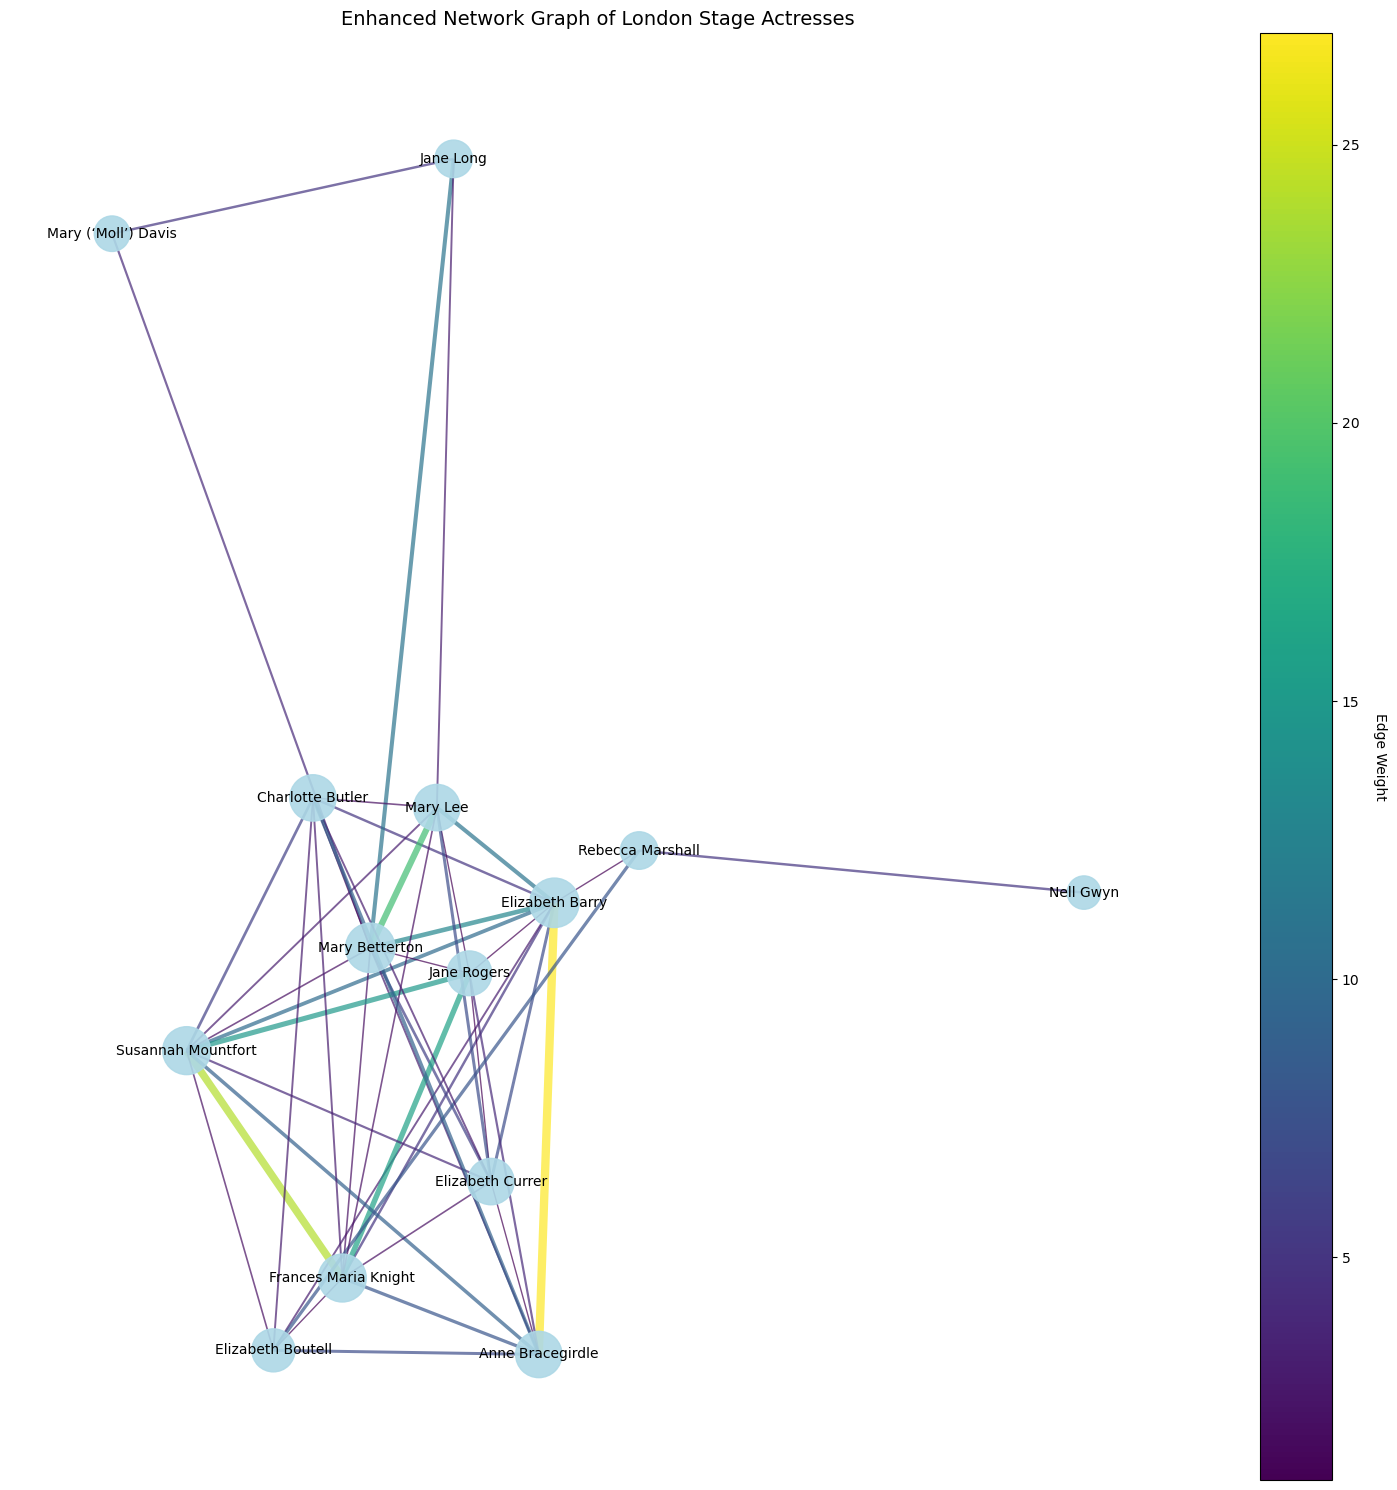

In [78]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np  # Required for scaling

# Create graph
G = nx.Graph()

# Add nodes and edges with weights
for actress in connections.index:
    G.add_node(actress)

for i in range(len(connections.index)):
    for j in range(i + 1, len(connections.index)):
        weight = connections.iloc[i, j]
        if weight > 0:
            G.add_edge(connections.index[i], connections.index[j], weight=weight)

# Extract edge weights
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize and scale
norm = plt.Normalize(min(weights), max(weights))
cmap = plt.cm.viridis
edge_colors = [cmap(norm(w)) for w in weights]
scaled_weights = [1 + 5 * (w - min(weights)) / (max(weights) - min(weights)) for w in weights]
node_sizes = [500 + 1000 * nx.degree_centrality(G)[n] for n in G.nodes()]

# Use kamada_kawai_layout to reduce edge-node overlap
pos = nx.kamada_kawai_layout(G)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_colors, width=scaled_weights, alpha=0.7)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_family='sans-serif')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Edge Weight', rotation=270, labelpad=20)
cbar.ax.set_facecolor('none')

# Final touches
ax.set_title('Enhanced Network Graph of London Stage Actresses', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
